# **Week 2 notebook**

### **Exercise 2.4:**

<img src="SymPyBilleder/2025-09-08-11-45-49.png" width="550">

##### **1.**

There is a strong positive correlation between the yield and the srping rainfall, meanwhile, the correlation between the yield and temperate seems less present, and it is slightly negative.

**Soltuion:**

The correlation between yield and rainfall is 0.80 indicating that a lot of rain will give large yields, and dry weather will normally be accompanied with a low yield of hay. The correlation between yield and temperature is negative indicating that high temperatures will be accompanied with low yield, and low temperatures with high yield.

##### **2.**

Formula on page 34 in the book:
$$
\rho_{ij|k} = \frac{\rho_{ij} - \rho_{ik}\rho_{jk}}{\sqrt{(1-\rho_{ik}^2)(1-\rho_{jk}^2)}}
$$
First we start with yield $1$ and temperature given $3$ rainfall $2$:
$$
\rho_{13|2} = \frac{\rho_{13} - \rho_{12}\rho_{23}}{\sqrt{(1-\rho_{12}^2)(1-\rho_{23}^2)}}
$$

$$
= \frac{-0.40 - (0.80)(-0.56)}{\sqrt{(1-(0.80)^2)(1-(-0.56)^2)}} = 0.097
$$

##### **3.**

We take the R code from the lecture, because we can basically make the matrix:
$$
\Sigma = \begin{bmatrix} 1 & 0.8 & -0.4 \\ 0.8 & 1 & -0.56 \\ -0.4 & -0.56 & 1 \end{bmatrix}
$$
So now we just calculate.

In [4]:
Sigma <- matrix(c(1, 0.8, -0.4,
                    0.8, 1, -0.56,
                    -0.4, -0.56, 1), ncol=3)

Sigma.11<-Sigma[1:2,1:2]
Sigma.12<-Sigma[1:2,3]
Sigma.21<-Sigma[3,1:2]
Sigma.22<-Sigma[3,3]

(Sigma1.2<-Sigma.11-Sigma.12%*%solve(Sigma.22)%*%Sigma.21)

D <- diag(1 / sqrt(diag(Sigma1.2)))
Cond.Corr <- D %*% Sigma1.2 %*% D
Cond.Corr

0.840,0.5760
0.576,0.6864


1.0000000,0.7585674
0.7585674,1.0000000


**Solution:**

We see that the correlation between yield and temperature and between yield and temperature given the rainfall have opposite signs. The interpretation is that if we consider years with a given amount of rain then we will normally have a higher yield of hay in warmer years than we get in colder years, i.e. higher temperature has a positive effect on the yield of hay. This seems natural. The reason for the presumably opposite conclusion in 1 is that warmer years are normally accompanied with low rainfall , which again has a negative influence on the yield of hay!

##### **4.**

Once we control the temperature, there is still a positive correlation between the yield and the spring rainfall, only a little less than before, but still strong.

##### **5.**

...


### **Exercise 2.5**

<img src="SymPyBilleder/2025-09-08-11-48-47.png" width="550">

##### **1.**

In [11]:
sundhed <- read.table("../data/sundhed.txt")
names(sundhed)<-c("age", "weight", "oxygen", "runtime", "restpulse", "runpulse", "maxpulse")

# Now we change all <chr> into <int>
sundhed[] <- lapply(sundhed, function(x) as.numeric(as.character(x)))
head(sundhed)

,age,weight,oxygen,runtime,restpulse,runpulse,maxpulse
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,44,89.47,44.609,11.37,62,178,182
2,40,75.07,45.313,10.07,62,185,185
3,44,85.84,54.297,8.65,45,156,168
4,42,68.15,59.571,8.17,40,166,172
5,38,89.02,49.874,9.22,55,178,180
6,47,77.45,44.811,11.63,58,176,176


In [12]:
# Now for the correlations:
my.R <- cor(sundhed)
my.R

,age,weight,oxygen,runtime,restpulse,runpulse,maxpulse
age,1.0000000,-0.23353903,-0.3045924,0.1887453,-0.16409995,-0.3378703,-0.4329159
weight,-0.2335390,1.00000000,-0.1627528,0.1435076,0.04397417,0.1815163,0.2493812
oxygen,-0.3045924,-0.16275285,1.0000000,-0.8621949,-0.39935611,-0.3979742,-0.2367402
runtime,0.1887453,0.14350758,-0.8621949,1.0000000,0.45038260,0.3136478,0.2261030
restpulse,-0.1640999,0.04397417,-0.3993561,0.4503826,1.00000000,0.3524606,0.3051240
runpulse,-0.3378703,0.18151633,-0.3979742,0.3136478,0.35246060,1.0000000,0.9297538
maxpulse,-0.4329159,0.24938123,-0.2367402,0.2261030,0.30512400,0.9297538,1.0000000


We see how run pulse is heavily correlated with max pulse, also run time is heavily negatively correlated with runtime.

**Solution:**

In the matrix of scatterplots we see that especially oxygen-runtime and runpulse-maxpulse are strongly correlated, the first with a negative correlation, the second with a positive correlation.

The conclusions drawn from the scatterplots are confirmed by the fact that the two correlations are by far the most significant ones, with -0.862 for oxygen-runtime and 0.930 for runpulse-maxpulse. The three stars next to their correlation values in the scatterplot indicate that the correlation is highly significant.

Additionally, we see four correlations that are significant, shown in the scatterplot with a single star.

##### **2.**

We use this formula again:
$$
\rho_{ij|k} = \frac{\rho_{ij} - \rho_{ik}\rho_{jk}}{\sqrt{(1-\rho_{ik}^2)(1-\rho_{jk}^2)}}
$$
Now we do it in R for all variables first with respect to age and then weight.

In [28]:
# Partial correlation function
partial_cor <- function(r_ij, r_ik, r_jk) {
  numerator <- r_ij - r_ik * r_jk
  denominator <- sqrt((1 - r_ik^2) * (1 - r_jk^2))
  return(numerator / denominator)
}

In [29]:
# Now we use it:
# Examples of calculations from Task 2

# Partial correlation between oxygen and runtime, given age
rho_ox_run_age <- partial_cor(
  my.R["oxygen", "runtime"],
  my.R["oxygen", "age"],
  my.R["runtime", "age"]
)

# Partial correlation between restpulse and runpulse, given age
rho_rp_rnp_age <- partial_cor(
  my.R["restpulse", "runpulse"],
  my.R["restpulse", "age"],
  my.R["runpulse", "age"]
)

In [32]:
rho_ox_run_age
rho_rp_rnp_age

[1] -0.8576331

[1] 0.3056172

Here is an example of some.

Or we we use the R code below from solutions.

In [20]:
# Load library for rcorr:
library(Hmisc)

Fit_rcorr = as.matrix(sundhed)
print("Pearson correlation coefficients and significance test:")
rcorr(Fit_rcorr)

[1] "Pearson correlation coefficients and significance test:"


            age weight oxygen runtime restpulse runpulse maxpulse
age        1.00  -0.23  -0.30    0.19     -0.16    -0.34    -0.43
weight    -0.23   1.00  -0.16    0.14      0.04     0.18     0.25
oxygen    -0.30  -0.16   1.00   -0.86     -0.40    -0.40    -0.24
runtime    0.19   0.14  -0.86    1.00      0.45     0.31     0.23
restpulse -0.16   0.04  -0.40    0.45      1.00     0.35     0.31
runpulse  -0.34   0.18  -0.40    0.31      0.35     1.00     0.93
maxpulse  -0.43   0.25  -0.24    0.23      0.31     0.93     1.00

n= 31 


P
          age    weight oxygen runtime restpulse runpulse maxpulse
age              0.2061 0.0957 0.3092  0.3777    0.0630   0.0150  
weight    0.2061        0.3817 0.4412  0.8143    0.3284   0.1761  
oxygen    0.0957 0.3817        0.0000  0.0260    0.0266   0.1997  
runtime   0.3092 0.4412 0.0000         0.0110    0.0858   0.2213  
restpulse 0.3777 0.8143 0.0260 0.0110            0.0518   0.0951  
runpulse  0.0630 0.3284 0.0266 0.0858  0.0518             

In [30]:
# # Library for partial.r function
# library(ggm)    
# # Number of observations
# n = 31
# # Number of variables partialled out
# s = 2
# Fit_Partial = partial.r(Fit,c(3:7),c(1:2))

# Partial_Corr = corr.p(Fit_Partial,n-s,adjust="none")
# print("Pearson Partial correlation coefficients and significance test:")
# Partial_Corr
# # More specifically:
# print("Two newly significant correlations:")
# Partial_Corr$p[1,5]
# Partial_Corr$p[2,4]

# CANT RUN because I cannot get the required package ggm to install...

##### **3.**

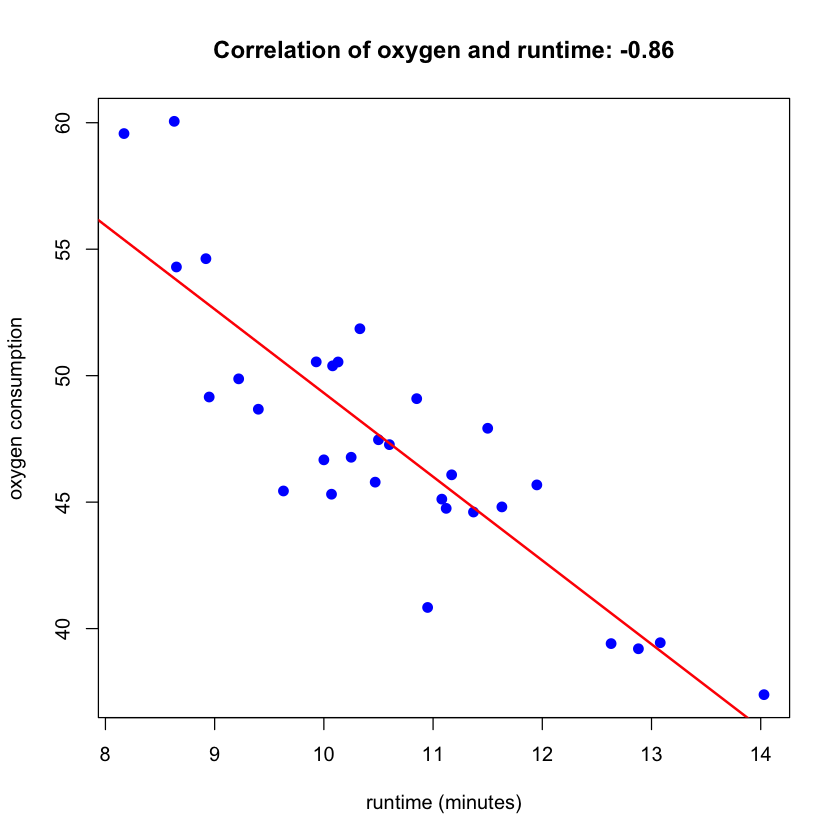

In [31]:
# Calculate the correlation between oxygen and runtime
rho_ox_rt <- cor(sundhed$oxygen, sundhed$runtime)

# Create the scatter plot
plot(
  x = sundhed$runtime,
  y = sundhed$oxygen,
  main = paste("Correlation of oxygen and runtime:", round(rho_ox_rt, 2)),
  xlab = "runtime (minutes)",
  ylab = "oxygen consumption",
  cex = 1.2,
  pch = 16,
  col = "blue"
)

abline(lm(sundhed$oxygen ~ sundhed$runtime), col = "red", lwd = 2)

# **Slide B in R code**

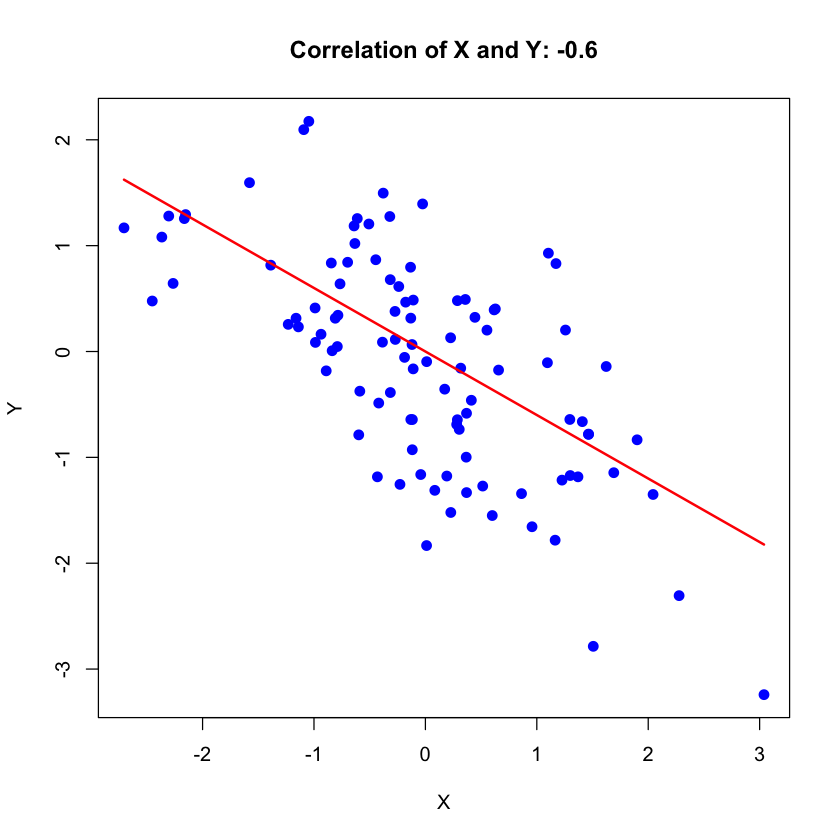

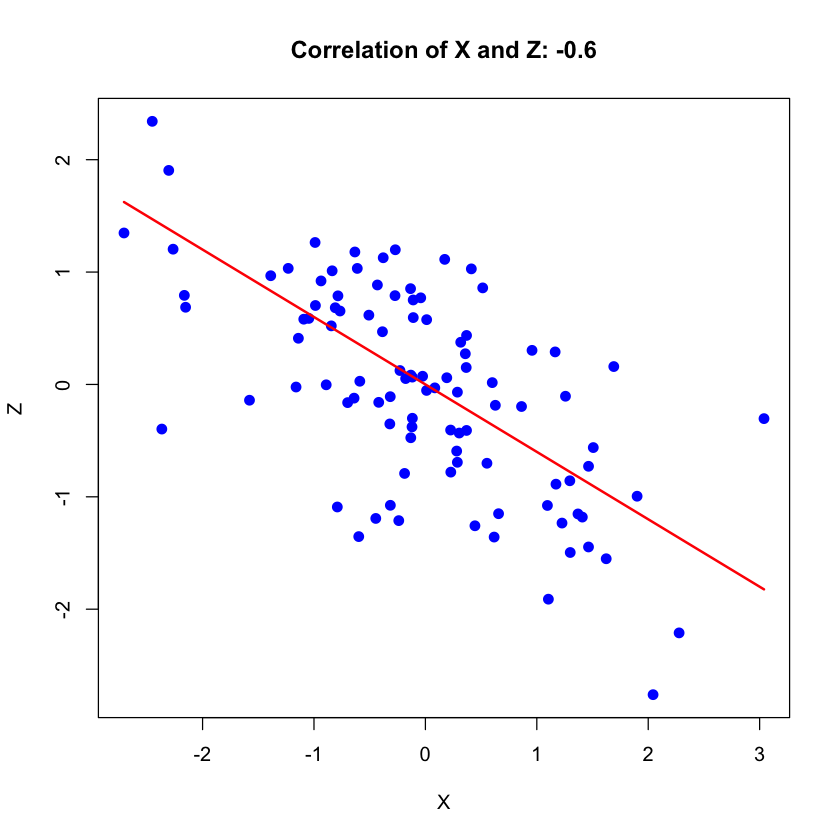

In [ ]:
# Slide 9:

set.seed(4197)
rho=-0.6
X<-rnorm(100)
W1<-rnorm(100)
W2<-rnorm(100)
W3<-rnorm(100)
Y<-rho*X+sqrt(1-rho^2)*W1
Z<-rho*X+sqrt(1-rho^2)*W2

plot(X,Y,main="Correlation of X and Y: -0.6",cex=1.2,pch=16,col="blue")
lines(sort(X),rho*sort(X),type="l",lwd=2,col="red")

plot(X,Z,main="Correlation of X and Z: -0.6",cex=1.2,pch=16,col="blue")
lines(sort(X),rho*sort(X),type="l",lwd=2,col="red")

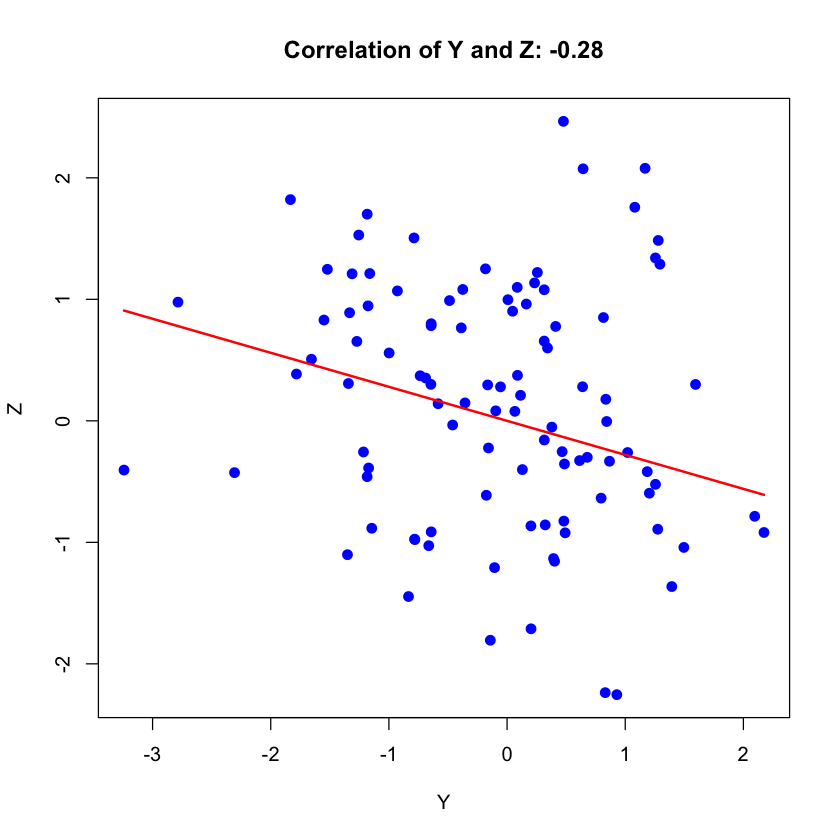

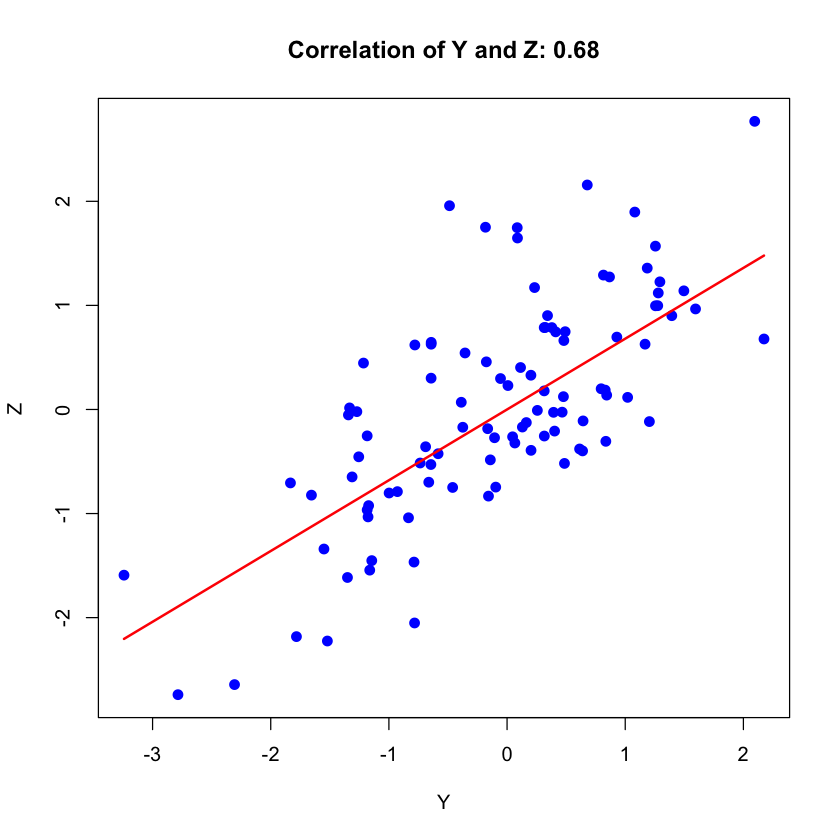

In [18]:
# Slide 12:

W2<--W1
Z<-rho*X+sqrt(1-rho^2)*W2
plot(Y,Z,main="Correlation of Y and Z: -0.28",cex=1.2,pch=16,col="blue")
lines(sort(Y),-0.28*sort(Y),type="l",lwd=2,col="red")

# Slide 13:

W2<- 0.5*W1+(sqrt(3)/2)*W3
Z<-rho*X+sqrt(1-rho^2)*W2
plot(Y,Z,main="Correlation of Y and Z: 0.68",cex=1.2,pch=16,col="blue")
lines(sort(Y),0.68*sort(Y),type="l",lwd=2,col="red")

In [5]:
# Slide 15:

heiwei<-read.table("../data/heiwei.txt",header=T,sep="\t",dec=".")

summary(heiwei)
head(heiwei)

# converting to cm and kg:
heiwei[,2]<-2.54*heiwei[,2]
heiwei[,3]<-0.453592*heiwei[,3]
heiwei<-heiwei[,2:3]
names(heiwei)<-c("height","weight")
head(heiwei)

my.n<-length(heiwei[,1])
my.1<-rep(1,my.n)
X<-as.matrix(heiwei)

mu.heiwei<-colMeans(heiwei)
mu.heiwei
Sigma.heiwei<-(t(X)%*%X- my.n*mu.heiwei%*%t(mu.heiwei))/(my.n-1)
Sigma.heiwei

# Faster:
# Sigma.heiwei<-var(heiwei)
# Sigma.heiwei

     Index       Height.Inches.  Weight.Pounds.  
 Min.   :    1   Min.   :60.28   Min.   : 78.01  
 1st Qu.: 6251   1st Qu.:66.70   1st Qu.:119.31  
 Median :12500   Median :68.00   Median :127.16  
 Mean   :12500   Mean   :67.99   Mean   :127.08  
 3rd Qu.:18750   3rd Qu.:69.27   3rd Qu.:134.89  
 Max.   :25000   Max.   :75.15   Max.   :170.92  

,Index,Height.Inches.,Weight.Pounds.
,<dbl>,<dbl>,<dbl>
1,1,65.78331,112.9925
2,2,71.51521,136.4873
3,3,69.39874,153.0269
4,4,68.21660,142.3354
5,5,67.78781,144.2971
6,6,68.69784,123.3024


,height,weight
,<dbl>,<dbl>
1,167.0896,51.25249
2,181.6486,61.90955
3,176.2728,69.41178
4,173.2702,64.56220
5,172.1810,65.45201
6,174.4925,55.92898


height    weight 
172.70251  57.64221

,height,weight
height,23.33145,12.84736
weight,12.84736,27.97659


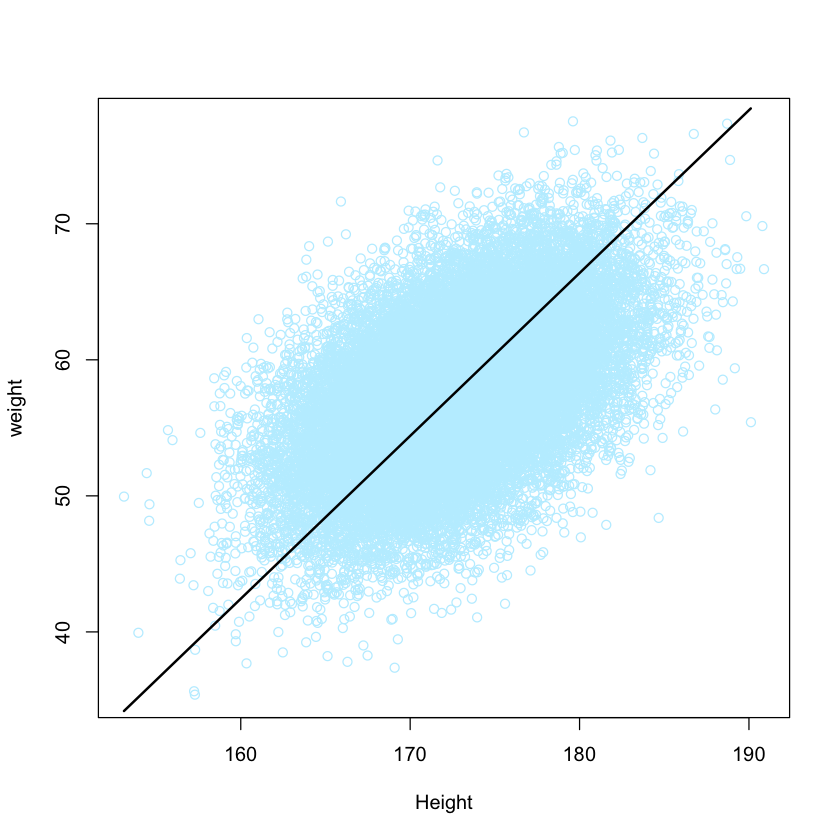

In [6]:
# Slide 16:

plot(heiwei$height,heiwei$weight,xlab='Height',ylab='weight',col="lightblue1")

# major axis of contour ellipse:
pc1<-eigen(Sigma.heiwei)$vectors[,1]
with(heiwei,lines(min(height):max(height),
                  mu.heiwei[2]+(pc1[2]/pc1[1])*((min(height):max(height))-mu.heiwei[1]),
                  type="l",lwd=2))

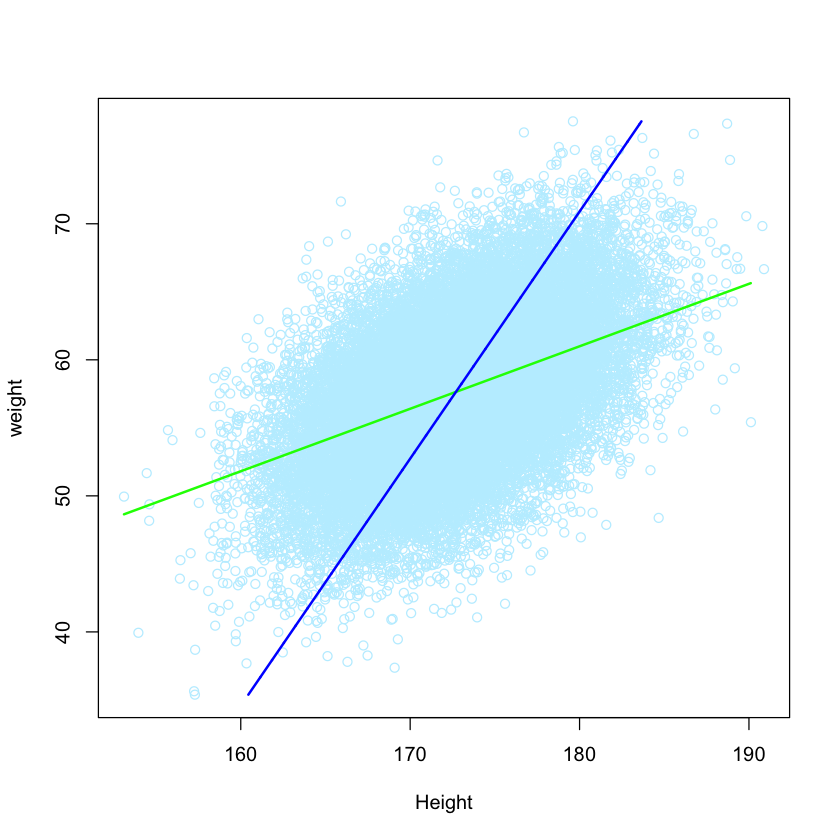

In [ ]:
# slide 23:
# conditional mean:

my.height<-min(heiwei$height):max(heiwei$height)
my.weight<-(round(100*min(heiwei$weight),digits=2):round(100*max(heiwei$weight),digits=2))/100

plot(heiwei$height,heiwei$weight,xlab='Height',ylab='weight',col="lightblue1") # Copy pasted from above, else I get error

lines(my.height,mu.heiwei[2]+(Sigma.heiwei[1,2]/Sigma.heiwei[2,2])*(my.height-mu.heiwei[1]),
      type="l",lwd=2,col="green")

lines(mu.heiwei[1]+(Sigma.heiwei[2,1]/Sigma.heiwei[1,1])*(my.weight-mu.heiwei[2]),my.weight,
      type="l",lwd=2,col="blue")

In [20]:
# Slide 24: 

#slope and intercept given height: 
alpha_1<-mu.heiwei[2]-(Sigma.heiwei[2,1]/Sigma.heiwei[1,1])*mu.heiwei[1]
beta_1<-(Sigma.heiwei[2,1]/Sigma.heiwei[1,1])

alpha_1;beta_1

#slope and intercept given weight:

alpha_2<-mu.heiwei[1]-(Sigma.heiwei[1,2]/Sigma.heiwei[2,2])*mu.heiwei[2]
beta_2<-(Sigma.heiwei[1,2]/Sigma.heiwei[2,2])

alpha_2;beta_2

# given 180cm:
alpha_1+beta_1*180

# given 65 kg:
alpha_2+beta_2*65

weight 
-37.4557

[1] 0.5506458

height 
146.2321

[1] 0.4592184

weight 
61.66054

height 
176.0813

In [ ]:
# Slide 31:

Sigma <- matrix(c(1, 0.5, 0.7,
                    0.5, 1, 0.7,
                    0.7, 0.7, 1), ncol=3)

Sigma.11<-Sigma[1:2,1:2]
Sigma.12<-Sigma[1:2,3]
Sigma.21<-Sigma[3,1:2]
Sigma.22<-Sigma[3,3]

(Sigma1.2<-Sigma.11-Sigma.12%*%solve(Sigma.22)%*%Sigma.21)

D <- diag(1 / sqrt(diag(Sigma1.2)))
Cond.Corr <- D %*% Sigma1.2 %*% D
Cond.Corr

0.51,0.01
0.01,0.51


1.00000000,0.01960784
0.01960784,1.00000000


In [4]:
# Slide  40:

my.corr<-diag(rep(1,5))
my.corr[lower.tri(my.corr)]<-c(-0.309,     
                                0.091,0.192,
                                0.158,0.120,0.745,
                                0.344,-0.166,0.320,0.464)
my.corr<-my.corr+t(my.corr)-diag(rep(1,5))

colnames(my.corr)<-c("C3A","C3S","Blaine","Strgth3","Strgth28")
row.names(my.corr)<-colnames(my.corr)

#principal components and values:
eigen(my.corr)

#partial covariance:

Sigma.11<-my.corr[-3,-3]
Sigma.12<-my.corr[-3,3]
Sigma.21<-my.corr[3,-3]
Sigma.22<-my.corr[3,3]
Sigma.1.2<-Sigma.11-Sigma.12%*%solve(Sigma.22)%*%Sigma.21

# partial correlation:
cov2cor(Sigma.1.2)

eigen() decomposition
$values
[1] 2.0704469 1.2903890 1.0941118 0.4958311 0.0492212

$vectors
           [,1]       [,2]        [,3]       [,4]       [,5]
[1,] 0.02237628  0.6488360  0.60415797 -0.3204363 -0.3329038
[2,] 0.59652632 -0.3282360 -0.19519336 -0.3603886 -0.6069902
[3,] 0.12228096  0.5578375 -0.66628257 -0.3972132  0.2686147
[4,] 0.61640451 -0.1242899  0.37857867 -0.1762646  0.6559013
[5,] 0.49874693  0.3803188 -0.09817555  0.7606531 -0.1355641


,C3A,C3S,Strgth3,Strgth28
C3A,1.0000000,-0.3235912,0.2108949,0.1365997
C3S,-0.3235912,1.0000000,0.7813280,0.3249089
Strgth3,0.2108949,0.7813280,1.0000000,0.5535000
Strgth28,0.1365997,0.3249089,0.5535000,1.0000000
